In [1]:
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import numpy as np
import sklearn.inspection 

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

X = X[(y-1<=0)]
y = y[(y-1<=0)]

In [3]:
lsvc = LinearSVC(loss="hinge")
lsvc.fit(X, y)
svc = SVC(kernel="linear")
svc.fit(X, y)
sgd = SGDClassifier(loss="hinge")
sgd.fit(X, y)

SGDClassifier()

[]

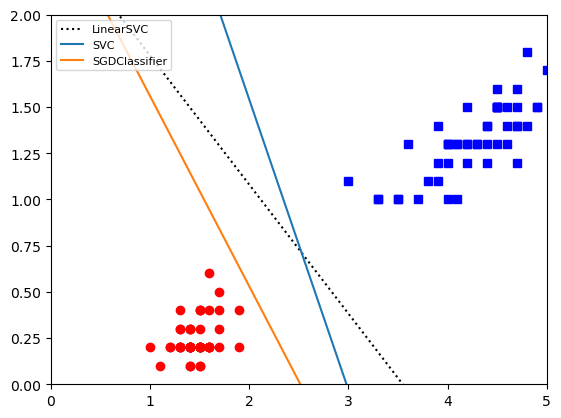

In [4]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
xaxis = np.linspace(0, 5, 100)
yaxis = np.linspace(0, 2, 100)
plt.plot(xaxis, -((lsvc.coef_[0][0]/lsvc.coef_[0][1])*xaxis + lsvc.intercept_/lsvc.coef_[0][1]), "k:", label="LinearSVC")
plt.plot(xaxis, -((svc.coef_[0][0]/svc.coef_[0][1])*xaxis + svc.intercept_/svc.coef_[0][1]), label="SVC")
plt.plot(xaxis, -((sgd.coef_[0][0]/sgd.coef_[0][1])*xaxis + sgd.intercept_/sgd.coef_[0][1]), label="SGDClassifier")
plt.legend(loc="upper left", fontsize=8)
plt.axis([0, 5, 0, 2])
plt.plot()

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [7]:
mr = SVC(decision_function_shape="ovr")
mr.fit(X_train, y_train)

SVC()

In [9]:
mr.score(X_test, y_test)

0.977

In [10]:
confusion_matrix(mr.predict(X_test), y_test)

array([[1396,    0,    2,    1,    1,    2,    2,    1,    3,    2],
       [   1, 1569,    0,    1,    2,    1,    2,    5,    7,    3],
       [   3,    2, 1343,   10,    4,    2,    0,   11,    8,    3],
       [   1,    3,    5, 1381,    0,   11,    0,    0,   10,   11],
       [   1,    1,    3,    0, 1319,    1,    4,    6,    4,   13],
       [   3,    1,    0,   11,    0, 1237,    4,    1,    5,    3],
       [   1,    1,    1,    1,    3,    7, 1338,    0,    5,    0],
       [   0,    5,    6,    9,    1,    0,    0, 1471,    1,   13],
       [   4,    1,    6,   11,    1,    4,    3,    2, 1316,    7],
       [   1,    2,    0,    7,   21,    4,    0,    9,    4, 1308]])

In [142]:
X_train.shape

(1437, 64)